Answers to the additional questions are scattered all around this document, I hope this won't be a problem

In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 21, 12
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

codec1 = pd.read_csv('assignment/codec1.csv')
codec2 = pd.read_csv('assignment/codec2.csv')

In [2]:
print(codec1.info())
print(codec2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 21 columns):
Type               1654 non-null object
Sample             1654 non-null object
Frame Size         1654 non-null object
Chroma             1654 non-null int64
Bitrate            1654 non-null object
Frames             1654 non-null int64
PSNR(Y)            1654 non-null float64
PSNR(U)            1654 non-null float64
PSNR(V)            1654 non-null float64
PSNR(YUV)          1654 non-null float64
SSIM(Y,dB)         1654 non-null float64
SSIM(U,dB)         1654 non-null float64
SSIM(V,dB)         1654 non-null float64
SSIM(YUV,dB)       1654 non-null float64
Streams            1654 non-null float64
FPS                1654 non-null float64
GPU_Power          1650 non-null float64
CPU_Power          1654 non-null float64
System_Power       1646 non-null float64
CPU_Utilization    1654 non-null object
Encoded_Bitrate    1654 non-null float64
dtypes: float64(14), int64(2), object(5)


We got 16 columns with numerical data and 5 with objects/strings. Let's see their statistical properties

In [3]:
codec1.describe()

,Chroma,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,Encoded_Bitrate
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1650.000000,1654.000000,1646.000000,1654.000000
mean,424.498186,1074.787183,39.873573,43.217781,43.635860,40.792728,14.847359,15.417085,15.692246,14.896699,8.793229,74.993253,43.457018,90.583652,462.573609,9.291270
std,9.368877,1020.806363,5.433826,4.170283,4.023437,5.020327,4.206852,3.579125,3.493057,3.764532,2.391668,39.866250,1.488449,2.700566,19.561874,4.331969
min,420.000000,206.000000,22.347100,29.567100,29.776400,24.005100,3.042100,4.384700,5.746400,3.995600,8.000000,12.960000,33.320000,81.880000,388.330000,3.638000
25%,420.000000,415.000000,36.286775,40.457525,41.162350,37.426100,11.941700,13.124550,13.407550,12.240850,8.000000,48.460000,42.630000,89.110000,449.980000,5.848200
50%,420.000000,685.000000,40.006600,43.317350,43.473150,40.915000,14.978100,15.339600,15.530450,14.855950,8.000000,65.960000,43.490000,90.540000,466.330000,8.091500
75%,420.000000,1115.000000,43.579750,45.865875,46.259675,44.243650,17.729425,17.536000,17.866175,17.345325,8.000000,114.960000,44.290000,91.740000,476.500000,11.203525
max,444.000000,4689.000000,54.225600,57.404000,59.364300,55.862400,28.649700,30.570600,30.642600,28.345800,16.000000,149.960000,47.680000,102.710000,508.850000,25.073600


In [4]:
codec2.describe()

,Chroma,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,Encoded_Bitrate
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1650.000000,1654.000000
mean,424.498186,1074.787183,39.933846,43.071235,43.510141,40.726606,14.496417,14.813790,11.766158,14.409333,15.042322,46.048573,38.378912,92.507110,226.620073,9.246249
std,9.368877,1020.806363,5.788910,4.709323,4.581589,5.407828,4.294184,3.700670,3.854124,3.824738,2.597760,32.440241,1.082353,3.287554,10.084672,4.355243
min,420.000000,206.000000,-1.750825,-0.469683,-1.768174,-1.957731,-1.425352,-1.870864,-5.737500,-1.507658,8.000000,6.710000,36.130000,76.070000,163.440000,3.646100
25%,420.000000,415.000000,36.328400,40.398800,40.970200,37.529675,11.578525,12.519900,9.369025,11.906550,16.000000,25.710000,37.620000,91.540000,222.500000,5.769175
50%,420.000000,685.000000,40.079400,43.313550,43.510700,40.893700,14.693050,14.810650,11.760700,14.361800,16.000000,36.710000,38.140000,92.610000,227.480000,8.056800
75%,420.000000,1115.000000,43.761400,45.702300,46.285100,44.156775,17.363750,16.948325,14.121500,16.928425,16.000000,59.710000,39.040000,93.970000,232.440000,11.160875
max,444.000000,4689.000000,55.042400,57.475500,58.323000,55.686300,29.119300,30.976300,27.195700,28.157400,16.000000,187.710000,41.830000,103.710000,250.750000,25.231600


In [5]:
codec1.describe(include=['object'])

,Type,Sample,Frame Size,Bitrate,CPU_Utilization
count,1654,1654,1654,1654,1654
unique,6,414,3,9,211
top,g1,s310,720p,7M,4.05%
freq,1156,4,744,357,32


In [6]:
codec2.describe(include=['object'])

,Type,Sample,Frame Size,Bitrate,CPU_Utilization
count,1654,1654,1654,1654,1654
unique,6,414,3,9,227
top,g1,s310,720p,7M,0.45%
freq,1156,4,744,357,28


First of all, there are 12 instances with missing system and gpu power values in Codec1 dataset and 4 instances with missing system power values in Codec2 dataset.
Secondly, I see clear difference in the number of encoding streams used, FPS, and System Power, I'll return to this statements a little bit later.
Also, there is something going on with metrics in Codec2 dataset, I will try to find the reason why its minimum values is negative.

In [7]:
codec1_na_free = codec1.dropna()
print(codec1_na_free.shape)
codec2_na_free = codec2.dropna()
print(codec2_na_free.shape)

(1642, 21)
(1650, 21)


In [8]:
codec1_only_na = codec1[~codec1.index.isin(codec1_na_free.index)]
codec1_only_na

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
220,g1,s56,720p,420,2.5M,246,45.8257,46.7411,46.6823,46.4389,21.0067,18.6288,18.5603,20.2604,8.0,100.96,46.02,91.08,NaN,4.95%,4.5498
221,g1,s56,720p,420,4M,246,47.9998,47.7321,47.9358,47.4759,22.6585,19.1697,19.8993,21.3427,8.0,100.96,46.02,91.08,NaN,4.95%,5.5199
222,g1,s56,720p,420,7M,246,49.4491,48.0165,48.9731,49.3343,24.1726,20.3199,20.8584,22.6995,8.0,100.96,46.02,91.08,NaN,4.95%,7.3599
223,g1,s56,720p,420,8M,246,49.0469,48.3501,49.0999,49.8107,24.5838,20.9382,20.8818,23.4002,8.0,100.96,46.02,91.08,NaN,4.95%,8.1826
224,g1,s57,720p,444,2.5M,246,43.7851,43.3168,44.2636,44.4634,20.4109,15.7309,15.8346,16.8663,8.0,77.96,NaN,88.98,429.33,3.60%,4.7050
225,g1,s57,720p,444,4M,246,46.9779,44.6515,44.8058,44.5007,22.5121,16.0937,16.8443,17.4859,8.0,77.96,NaN,88.98,429.33,3.60%,5.6992
226,g1,s57,720p,444,7M,246,47.6659,45.6508,46.4828,47.6541,23.5165,17.5321,17.8837,19.5410,8.0,77.96,NaN,88.98,429.33,3.60%,7.7324
227,g1,s57,720p,444,8M,246,49.3578,46.7574,46.5952,48.0565,24.1897,18.3531,18.4808,19.1329,8.0,77.96,NaN,88.98,429.33,3.60%,8.7626
272,g1,s69,1080p,420,4M,206,42.2360,44.3660,43.4563,43.6655,15.6454,16.5232,15.7481,16.0782,8.0,38.96,41.04,90.68,NaN,3.28%,6.1665
273,g1,s69,1080p,420,7M,206,44.8918,44.8595,44.8216,44.1318,16.5881,16.8590,16.1536,17.2197,8.0,38.96,41.04,90.68,NaN,3.28%,8.4224


In [9]:
codec2_only_na = codec2[~codec2.index.isin(codec2_na_free.index)]
codec2_only_na

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
220,g1,s56,720p,420,2.5M,246,45.3989,46.0391,46.9277,47.4568,22.2118,18.1259,13.5675,20.0633,16.0,52.71,36.56,95.01,NaN,2.26%,4.7081
221,g1,s56,720p,420,4M,246,48.4780,47.4362,47.7654,47.5372,22.7329,19.3256,16.2349,21.1605,16.0,52.71,36.56,95.01,NaN,2.26%,5.8662
222,g1,s56,720p,420,7M,246,50.5089,49.4048,49.1524,48.8428,23.1995,20.4791,16.6075,21.7728,16.0,52.71,36.56,95.01,NaN,2.26%,7.8892
223,g1,s56,720p,420,8M,246,51.0008,48.3648,50.1640,49.7596,24.0483,20.7929,17.0721,21.6871,16.0,52.71,36.56,95.01,NaN,2.26%,8.5788


There are a couple of things we can do with instances with missing values: drop them or fill them. For now I will fill them using linear interpolation which might not be the optimal approach in the long run, considering grouped structure of the data and the fact that power values are the same within sample.

In [10]:
codec1.interpolate(inplace=True)#.iloc[265:275] #467.466, 457.932, 448.398, 438.864
codec2.interpolate(inplace=True)

Its time to talk about negative values of PSNR and SSIM in codec2 dataset. Given that PSNR = 20*log10(MAXi) - 10*log10(MSE), it can take negative value only if MSE is very high, which means that difference between raw and encoded frame pixels is huge.
Looking at range of values of SSIM(it should be bound to [-1;1] interval, which is not the case in this datasets), I assume that some transformation were made to it so it could be interpreted in dB, like PSNR. I suppose this transformation can look like this: -10 * log10 (1 - SSIM). This transformed value can be negative only if SSIM itself is negative, which in its turn could happen if covariance between windows is negative (some window 'region' in the encoded frame is inverted?).<br> 
<strong>You may probably noticed the SSIM values much lower than PSNR for the same observations. Could you explain the reason why it happens? Does SSIM indicate much lower quality than PSNR?</strong><br>
So the small values of this version of SSIM(compared with PSNR) should not be considered as a sign of lower quality, its just the way its calculated. Given that the frames are in YUV color scheme, the 20*log10(255) part of PSNR equals 48.13, pixelwise MSE tends to produce small values, as we can see in this table. The mean SSIM(dB) value of ~15 is clearly possible if native SSIM is close to 1, meaning the similarity between raw and encoded frames is high, assuming SSIM(dB) = -10 * log10 (1 - SSIM).

Let's cut off samples which lies beyond 3*standard deviations around the mean

In [12]:
metric_columns = [x for x in codec1.columns if 'PSNR' in x or 'SSIM' in x]
codec1_no_outliers = codec1
codec2_no_outliers = codec2
# I want to take a look at outliers so I'll save them too
outliers1 = pd.DataFrame(columns=codec1.columns)
outliers2 = pd.DataFrame(columns=codec2.columns)
# Here Im considering only metric features
for metric in metric_columns:
    outliers2 = outliers2.append(codec2_no_outliers[(np.abs(codec2_no_outliers[metric]-codec2_no_outliers[metric].mean()) > (3*codec2_no_outliers[metric].std()))])
    outliers1 = outliers1.append(codec1_no_outliers[(np.abs(codec1_no_outliers[metric]-codec1_no_outliers[metric].mean()) > (3*codec1_no_outliers[metric].std()))])
    codec2_no_outliers = codec2_no_outliers[np.abs(codec2_no_outliers[metric]-codec2_no_outliers[metric].mean()) <= (3*codec2_no_outliers[metric].std())]
    codec1_no_outliers = codec1_no_outliers[np.abs(codec1_no_outliers[metric]-codec1_no_outliers[metric].mean()) <= (3*codec1_no_outliers[metric].std())]
print(codec1_no_outliers.shape) #How many istances left after deleting outliers
print(codec2_no_outliers.shape)

outliers1.sort_index(inplace=True)
outliers2.sort_index(inplace=True)

(1633, 21)
(1626, 21)


Some of the outlier samples are common for both datasets, but there are also unique ones.
In order to measure the quality of codecs, I want to see the difference in the key features between datasets. To make this work I need both datasets to consist of exactly the same samples, so I'll drop unique samples appeared after outlier deletion. <br>
Key features for measuring quality are: PSNR, SSIM (especially their Y and YUV versions), encoded bitrate. Also I must take into account the grouping of data, so I will be comparing samples that belong to the same type(group), bitrate, chroma and frame size. <br>

In [13]:
index_set1 = set(outliers1.index) 
index_set2 = set(outliers2.index)
#print(sorted(set1 - set2))
#print(sorted(set2 - set1))

indexes_to_drop_in_codec2 = index_set1 - index_set2
indexes_to_drop_in_codec1 = index_set2 - index_set1
codec1_unified = codec1_no_outliers.drop(indexes_to_drop_in_codec1)
codec2_unified = codec2_no_outliers.drop(indexes_to_drop_in_codec2)
print(codec1_unified.shape)
print(codec2_unified.shape)

(1620, 21)
(1620, 21)


If I were asked to accumulate all quality factors in one feature, I would create Frankenstein like that:<br>
quality = PSNR(Y) + 0.5*PSNR(U) + 0.5*PSNR(V) + PSNR(YUV) + 1.2 * SSIM(Y,dB) + 0.5 * SSIM(U,dB) + 1.2 * SSIM(YUV,dB) + Encoded_Bitrate) / n <br>
First of all, I assume that Y and YUV components should be weighted higher than U and V, because Y represents brightness, which I suppose more important(although it may not be true for all chroma values), and YUV is combination of all three. Then, I consider SSIM as more reliable metric than PSNR. And the last but not least - Encoded Bitrate, I picked this feature because of the general assumption - the more data per second is shown, the better the quality. I am aware of the fact that it may not be true for different generation of codecs (like comparing h.263 and h.264 for example) <br>
Looking at FPS values I assume that it shows encoded frames per second. As I understand, Streams feature indicates number of concurrent codec processes each of which encodes its own part of the video sample. This means I can get time consumed to encode the whole sequence, and fps per stream.
Obviously, if we measured codec efficiency we would need to pay attention to power consumption and cpu utilization features

In [81]:
#Create speed feature
codec1_unified['Secs Consumed'] = codec1_unified['Frames'] / codec1_unified['FPS']
codec2_unified['Secs Consumed'] = codec2_unified['Frames'] / codec2_unified['FPS']
codec1_unified['FPS per Stream'] = codec1_unified['FPS'] / codec1_unified['Streams']
codec2_unified['FPS per Stream'] = codec2_unified['FPS'] / codec2_unified['Streams']

In [82]:
grouping_columns = ['Type', 'Bitrate', 'Sample', 'Encoded_Bitrate', 'Chroma', 'Frame Size', 'Secs Consumed', 'FPS per Stream']
codec1_quality = codec1_unified[metric_columns + grouping_columns]
codec2_quality = codec2_unified[metric_columns + grouping_columns]

codec1_quality_grouped = codec1_quality.groupby(['Type', 'Chroma', 'Frame Size', 'Bitrate']).mean()
codec2_quality_grouped = codec2_quality.groupby(['Type', 'Chroma', 'Frame Size', 'Bitrate']).mean()
# #codec1_quality_grouped.head()
difference = codec1_quality_grouped - codec2_quality_grouped
# print(difference.info())

difference.drop(columns=['SSIM(V,dB)'], inplace=True)
difference['Quality'] = (difference['PSNR(Y)'] + 0.5*difference['PSNR(U)'] + 0.5*difference['PSNR(V)'] + difference['PSNR(YUV)'] + 1.2*difference['SSIM(Y,dB)'] + 0.5*difference['SSIM(U,dB)'] + 1.2*difference['SSIM(YUV,dB)'] + difference['Encoded_Bitrate'])/8.0

difference.head(100)

PSNR(Y)   PSNR(U)   PSNR(V)  PSNR(YUV)  \
Type Chroma Frame Size Bitrate                                            
g1   420    1080p      10M      0.015282 -0.010159  0.016821   0.222498   
                       12M     -0.051442  0.186766  0.235225   0.071247   
                       4M      -0.032785  0.185592 -0.022905  -0.155677   
                       7M       0.019246  0.012013  0.213556  -0.122286   
            2160p      10M     -0.292474  0.015000  0.156879  -0.003765   
                       15M      0.321263  0.144800  0.150516   0.012812   
                       17M      0.083214  0.076428  0.085809   0.130826   
                       22M      0.095865  0.077481  0.003521   0.158912   
            720p       2.5M    -0.140179  0.082543  0.024689   0.037169   
                       4M      -0.116520  0.104914  0.039797   0.071535   
                       7M       0.018585 -0.035570 -0.063150   0.094697   
                       8M      -0.097901  0.163503  0.241716  -0.021545   
     444    1080p      10M     -0.039896  0.224843  0.060526   0.050917   
                       12M     -0.072596 -0.186070 -0.258357   0.131478   
                       4M      -1.486665 -0.256426 -0.429743  -0.383700   
                       7M      -0.669404 -0.261852  0.211852  -0.206209   
            2160p      10M     -2.099300  0.430900 -1.370100  -0.482300   
                       15M     -0.945900  0.214600 -0.226800   0.808200   
                       17M     -0.518600  0.084700  0.163400  -1.078400   
                       22M     -1.070800 -1.036900 -1.141100  -2.318100   
            720p       2.5M    -0.465800 -0.386639 -0.232504  -0.300035   
                       4M      -0.430357 -0.248470 -0.024217  -0.062178   
                       7M       0.178917  0.080048 -0.143039   0.082730   
                       8M      -0.184257  0.164957  0.141283   0.163796   
g2   420    1080p      10M     -0.536629 -0.028236  0.399464   0.192421   
                       12M     -0.307250  0.018757  0.013629   0.258021   
                       4M      -0.175864  0.296907 -0.005314   0.089436   
                       7M       0.070636  0.256864  0.187693  -0.097779   
            2160p      10M      0.685700  0.511100 -0.363000   0.541600   
                       15M      0.671500  0.824900 -0.049800   0.849100   
                       17M      0.287400  0.084600  1.341000   0.541100   
                       22M     -1.183700  1.205900  1.153300   1.782500   
            720p       2.5M     0.122743  0.489271  0.145250  -0.067800   
                       4M       0.071414  0.322721  0.313921  -0.111214   
                       7M      -0.083600  0.250900  0.402814  -0.048929   
                       8M      -0.024764  0.031879 -0.029914   0.047050   
     444    1080p      10M     -0.177867  0.688144  0.082267  -0.137778   
                       12M     -0.515978  0.419600  0.171356  -0.147733   
                       4M      -0.914756  0.146522 -0.516911  -0.649622   
                       7M      -0.521667 -0.270678 -0.028811   0.275067   
            720p       2.5M    -0.109450  0.109980  0.294740  -0.246540   
                       4M      -0.046550  0.144480 -0.172850   0.076690   
                       7M      -0.200740  0.232520 -0.072930  -0.233010   
                       8M      -0.185290 -0.001900  0.166850  -0.129770   
g3   420    1080p      10M      0.091419  0.055325 -0.380613   0.280944   
                       12M      0.150300  0.361712 -0.076487  -0.125744   
                       4M      -0.360337 -0.080544  0.131738  -0.300419   
                       7M       0.264713  0.054438  0.084550   0.061669   
            2160p      10M     -0.089925  0.244513 -0.534825   0.063025   
                       15M      0.034675 -0.060375 -0.289575  -0.074875   
                       17M      0.332275  0.285200 -0.395425   0.329338   
                       22M      0.348063  0.194488  0.1271

From this data I can conclude the following:<br>
**Group 1**:<br>
420 Chroma - In all possible frame sizes and bitrate codec1 is showing [better quality](#g1-420-720p) because of the substantial difference in SSIM metric. <br>
444 Chroma - Codec1 is showing better quality with [mid-range](#g1-444-720p) bitrate, Codec2 is better with low and high bitrate values (see example [graph](#BitrateGraph1)) <br>
**Group 2**: <br>
420 Chroma - Codec1 seems to be better because of the high SSIM values, despite the fact that PSNR and encoded bitrate are showing the opposite in some cases(1080p, 12Mbs and 2160p 22Mbs) <br>
444 Chroma - There is an interesting [case](#g2-444-1080p) in 1080p 4Mbs when codec2 leads in quality, in the rest of the cases codec1 is better <br>
**Group 3**: <br>
420 Chroma - same as group1 <br>
444 Chroma - Codec2 leads here, because of the substantial difference in PSNR(Y), PSNR(YUV), SSIM(YUV) and SSIM(Y) (see [graph](#g3-444)) <br>
**Group 4**: <br>
Group 4 had 8 instances at start, after cleaning it has only one instance left, and it shows that codec2 has great advantage with this sample almost in all metrics, I don't think we can accept this result as its based on single sample <br>
**Group 5**:<br>
420 Chroma - codec1 is slightly better than codec2, with an interesting exception in 1080p 10Mbs <br>
444 Chroma - 1080p codec2 outperforms codec1, 720p codec2 performs better at lower bitrate, codec1 is better at higher bitrate.<br>
**Group 6**:<br>
Here we have only 420 Chroma samples in 720p, codec1 is showing better results.


**Groups in which codec2 is faster (in all other groups codec1 wins):**

In [83]:
difference.loc[(difference['Secs Consumed'] > 0)]

PSNR(Y)   PSNR(U)   PSNR(V)  PSNR(YUV)  \
Type Chroma Frame Size Bitrate                                            
g3   420    720p       2.5M    -0.199337  0.013950  0.201481   0.308300   
                       4M      -0.062706  0.263850 -0.255794   0.064644   
                       7M      -0.010231  0.164681  0.025631   0.198062   
                       8M      -0.024219  0.155244  0.109644   0.076675   
     444    720p       2.5M    -1.554700 -1.571100 -0.431500  -0.824400   
                       4M      -1.394300  0.770600  0.349800  -2.105300   
                       7M      -0.037600 -0.088000 -1.444100  -2.207400   
                       8M      -0.635100 -0.228600 -0.481900  -0.118200   
g4   420    720p       2.5M    -2.597900 -1.977100 -1.213900  -2.537600   
g5   420    720p       2.5M    -0.207038 -0.454988 -0.049038  -0.132738   
                       4M      -0.336862  0.541537  0.294650  -0.328525   
     444    720p       2.5M    -1.963333  0.244967 -0.120833  -0.370267   
                       4M      -0.216400 -0.169500  0.087267  -0.866867   
                       7M       0.096533  0.228633 -0.540033   0.107800   
                       8M       0.118267 -0.367200  0.133600  -0.243533   
g6   420    720p       2.5M     0.133275 -0.287663 -0.031812   0.403075   
                       4M       0.207937  0.561637 -0.152650   0.038300   
                       7M       0.775612 -0.419350  0.006488   0.732612   
                       8M       0.379875 -0.006763 -0.514675   0.531575   

                                SSIM(Y,dB)  SSIM(U,dB)  SSIM(YUV,dB)  \
Type Chroma Frame Size Bitrate                                         
g3   420    720p       2.5M       0.490025    0.747300      0.420831   
                       4M         0.352081    0.927263      0.489131   
                       7M         0.360281    0.573656      0.428956   
                       8M         0.623769    0.618556      0.831856   
     444    720p       2.5M      -0.350900   -0.771800     -0.284400   
                       4M         0.060600   -0.531300     -0.194900   
                       7M        -1.125200    0.544200      0.412000   
                       8M        -0.698000    0.370600     -0.042500   
g4   420    720p       2.5M      -1.288800    0.428400     -1.748300   
g5   420    720p       2.5M       0.258275    0.359700      0.514937   
                       4M         0.084575    0.442562      0.235250   
     444    720p       2.5M      -0.374600    0.524267     -0.027067   
                       4M        -0.072267    0.579400      0.090233   
                       7M        -0.234100    0.894300      0.488167   
                       8M        -0.237867   -0.009833      0.379233   
g6   420    720p       2.5M       0.732800    0.699025      0.672075   
                       4M         0.679975    0.262662      0.594838   
                       7M         0.838862    0.239238      0.216113   
                       8M         0.439675    1.100912      0.262663   

                                Encoded_Bitrate  Secs Consumed  \
Type Chroma Frame Size Bitrate                                   
g3   420    720p       2.5M            0.097919       0.567481   
                       4M              0.085275       0.567481   
                       7M              0.086669       0.567481   
                       8M              0.084138       0.567481   
     444    720p       2.5M            0.064900       0.140287   
                       4M              0.055000       0.140287   
                       7M              0.010200       0.140287   
                       8M             -0.062900       0.140287   
g4   420    720p       2.5M            0.024300       0.682095   
g5   420    720p       2.5M            0.122763       0.207885   
                       4M              0.130988       0.207885   
     444    720p       2.5M            0.092900       2.090350   
                    

<a id='g1-420-720p'></a>
<h3>Group1, 4:2:0 Chroma, 720p</h3>

,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(YUV,dB)",Encoded_Bitrate,Quality
Bitrate,,,,,,,,,
2.5M,-0.140179,0.082543,0.024689,0.037169,0.409549,0.668443,0.442238,0.091695,0.174834
4M,-0.116520,0.104914,0.039797,0.071535,0.395080,0.673792,0.499281,0.070778,0.188535
7M,0.018585,-0.035570,-0.063150,0.094697,0.432638,0.656191,0.690045,0.037407,0.222081
8M,-0.097901,0.163503,0.241716,-0.021545,0.386448,0.606032,0.624324,0.021541,0.202581


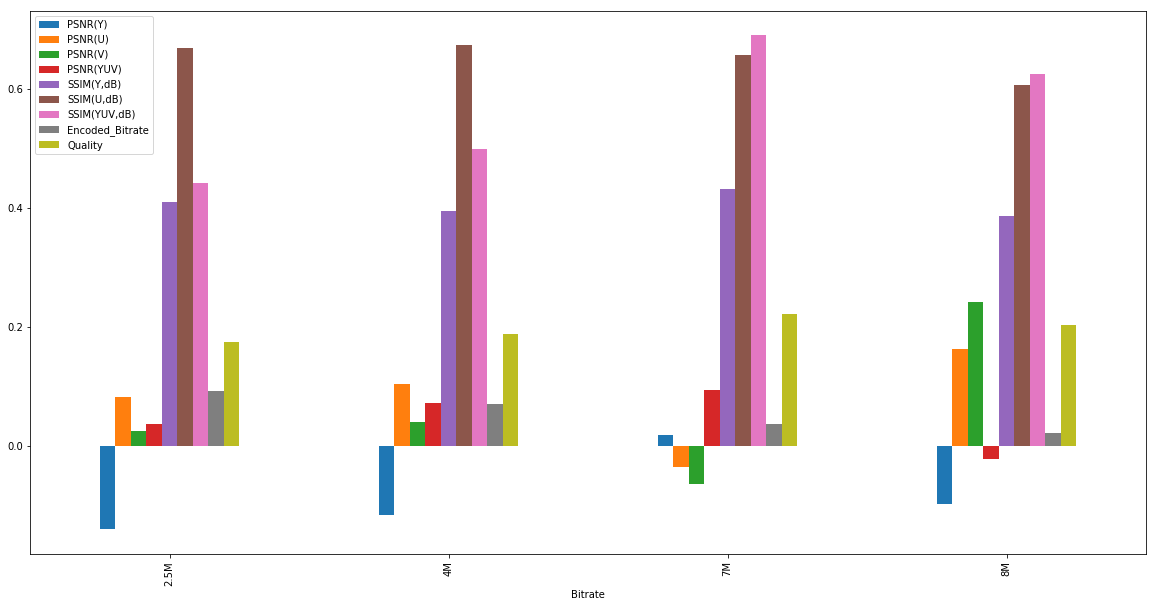

In [46]:
difference.loc[('g1', 420, '720p')].plot(kind='bar', figsize=(20,10))
difference.loc[('g1', 420, '720p')].head(50)

<a id='g1-444-720p'></a>
<h3>Group1, 4:4:4 Chroma, 720p</h3>

,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(YUV,dB)",Encoded_Bitrate,Quality
Bitrate,,,,,,,,,
2.5M,-0.465800,-0.386639,-0.232504,-0.300035,-0.057943,0.376617,0.181630,0.038626,-0.087506
4M,-0.430357,-0.248470,-0.024217,-0.062178,0.017574,0.206100,0.267665,-0.020152,-0.025462
7M,0.178917,0.080048,-0.143039,0.082730,0.349117,0.570313,0.565283,-0.081317,0.191409
8M,-0.184257,0.164957,0.141283,0.163796,0.212909,0.665752,0.151452,-0.122652,0.097514


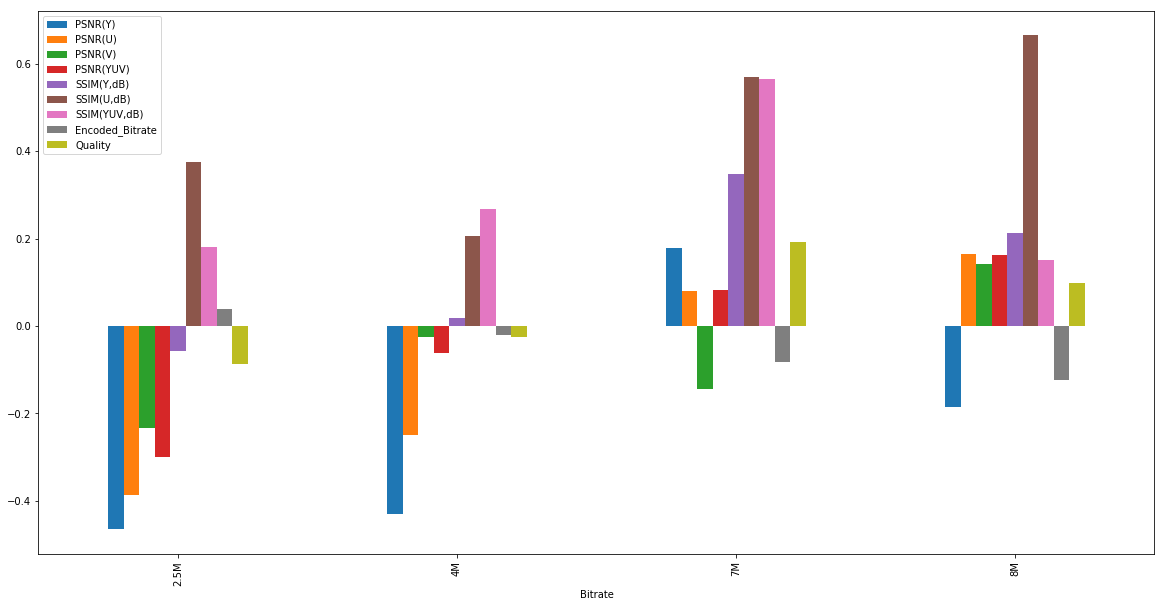

In [50]:
difference.loc[('g1', 444, '720p')].plot(kind='bar', figsize=(20,10))
difference.loc[('g1', 444, '720p')].head(50)

<a id='g2-444-1080p'></a>
<h3>Group2, 4:4:4 Chroma, 1080p</h3>

,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(YUV,dB)",Encoded_Bitrate,Quality
Bitrate,,,,,,,,,
10M,-0.177867,0.688144,0.082267,-0.137778,0.478233,0.180156,0.693400,0.010922,0.197065
12M,-0.515978,0.419600,0.171356,-0.147733,0.189789,0.741811,0.423867,-0.042389,0.087084
4M,-0.914756,0.146522,-0.516911,-0.649622,-0.181700,0.434478,-0.188100,0.107633,-0.233558
7M,-0.521667,-0.270678,-0.028811,0.275067,0.135489,0.326389,0.315922,0.060711,0.046157


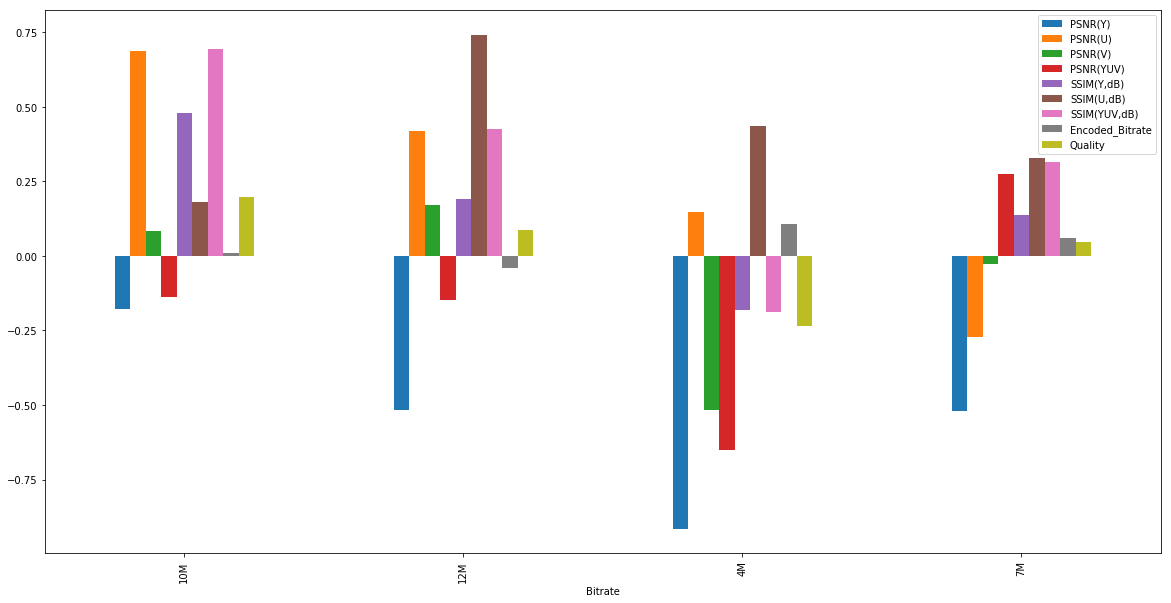

In [58]:
difference.loc[('g2', 444, '1080p')].plot(kind='bar', figsize=(20,10))
difference.loc[('g2', 444, '1080p')].head(50)

<a id='g3-444'></a>
<h3>Group3, 4:4:4 Chroma</h3>

PSNR(Y)   PSNR(U)   PSNR(V)  PSNR(YUV)  SSIM(Y,dB)  \
Frame Size Bitrate                                                        
1080p      10M     -1.572900  0.160800 -1.309300   0.082700   -0.445400   
           12M     -1.255400 -2.175100  1.075200  -1.192200   -0.320200   
           4M      -1.892900  0.030400  0.106800  -2.543300   -1.611300   
           7M      -1.980600 -0.254200 -0.885900  -1.539700    0.247400   
2160p      10M     -2.674967 -0.127467 -0.253000  -2.946400   -1.160933   
           15M     -2.130267 -0.985333 -0.690900  -0.371233   -0.576833   
           17M     -1.173400 -0.243433 -0.895633  -1.485133    0.089567   
           22M      0.554867 -0.575667  0.038400  -0.020933    0.025033   
720p       2.5M    -1.554700 -1.571100 -0.431500  -0.824400   -0.350900   
           4M      -1.394300  0.770600  0.349800  -2.105300    0.060600   
           7M      -0.037600 -0.088000 -1.444100  -2.207400   -1.125200   
           8M      -0.635100 -0.228600 -0.481900  -0.118200   -0.698000   

                    SSIM(U,dB)  SSIM(YUV,dB)  Encoded_Bitrate   Quality  
Frame Size Bitrate                                                       
1080p      10M       -0.429100      0.861700        -0.150600 -0.241255  
           12M        0.360600      1.173400        -0.108800 -0.237776  
           4M        -0.422500     -0.540700         0.024900 -0.892044  
           7M         0.245400      0.037000        -0.020100 -0.455809  
2160p      10M        0.006833     -1.105200         1.731333 -0.849526  
           15M        0.113700     -0.079200        -0.021433 -0.511430  
           17M        0.370167     -0.855033        -0.373933 -0.541935  
           22M        0.538967     -0.240600        -0.518000 -0.030237  
720p       2.5M      -0.771800     -0.284400         0.064900 -0.557970  
           4M        -0.531300     -0.194900         0.055000 -0.413901  
           7M         0.544200      0.412000         0.010200 -0.448074  
           8M         0.370600     -0.042500        -0.062900 -0.234344

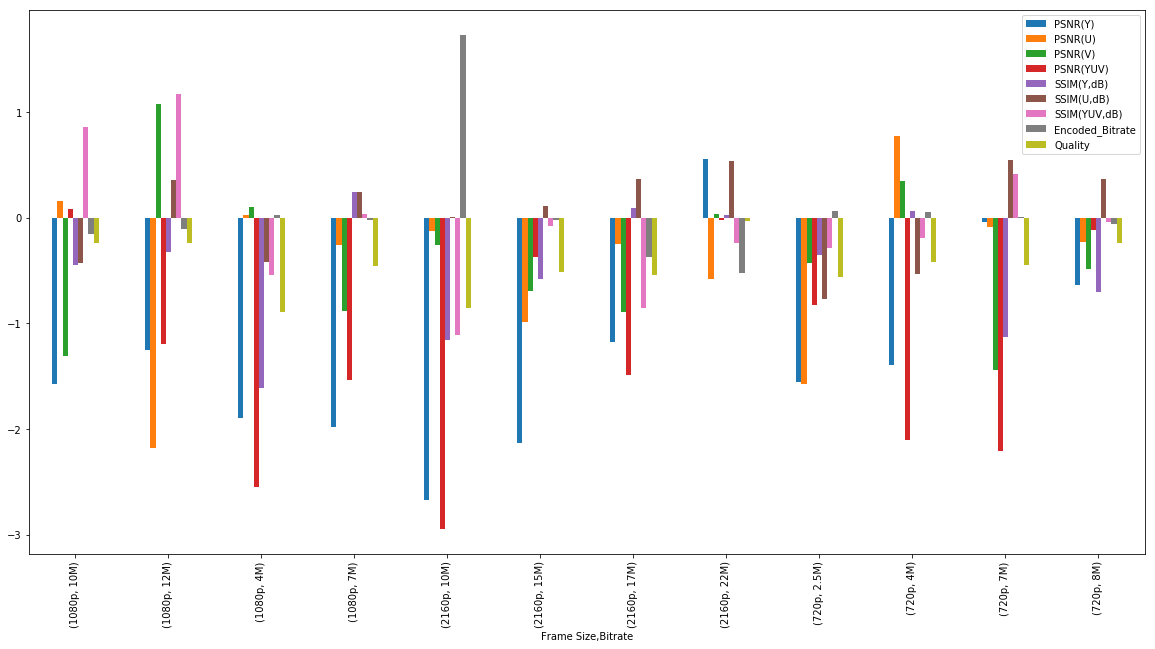

In [56]:
difference.loc[('g3', 444, )].plot(kind='bar', figsize=(20,10))

<h2>Conclusion</h2> <br>
Due to lack of the domain knowledge, I had to make several assumptions which may not be confirmed. Indeed, different codec groups have metrics significantly different. Ideas for further investigation: test another ways to deal with missing data, another quality metric, may be something interesting could be found with dimentionality reduction and clustering (distance between centroids)

<a id='BitrateGraph1'></a>
<h3>Bitrate-PSNR plot</h3>

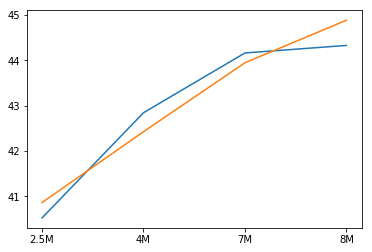

In [82]:
x1 = outlierless_codec1.loc[(outlierless_codec1['Type']=='g1') & (outlierless_codec1['Frame Size']=='720p') & (outlierless_codec1['Sample']=='s1')]
y1 = outlierless_codec1.loc[(outlierless_codec1['Type']=='g1') & (outlierless_codec1['Frame Size']=='720p') & (outlierless_codec1['Sample']=='s1')] 
x2 = outlierless_codec2.loc[(outlierless_codec2['Type']=='g1') & (outlierless_codec2['Frame Size']=='720p') & (outlierless_codec2['Sample']=='s1')]
y2 = outlierless_codec2.loc[(outlierless_codec2['Type']=='g1') & (outlierless_codec2['Frame Size']=='720p') & (outlierless_codec2['Sample']=='s1')] 
plt.plot(x1['Bitrate'], y1['PSNR(Y)'], label="codec1")
plt.plot(x2['Bitrate'], y2['PSNR(Y)'], label="codec2")

In [41]:
print(codec1.Type.value_counts()) #6 groups
#print(codec1_quality.Type.value_counts()) #6 groups
print(codec1_quality['Frame Size'].value_counts())
print(codec2_quality['Frame Size'].value_counts())
#print(codec1.Streams.value_counts()) #16.0     164, 8.0     1490
#print(codec1.Chroma.value_counts()) #same in both datasets
#print(codec1.Bitrate.value_counts()) #same in both datasets


g1    1156
g2     196
g3     180
g5      82
g6      32
g4       8
Name: Type, dtype: int64
720p     727
1080p    669
2160p    224
Name: Frame Size, dtype: int64
720p     727
1080p    669
2160p    224
Name: Frame Size, dtype: int64


In [69]:
print(codec2.Sample.value_counts())
#print(codec2.Streams.value_counts()) #16.0    1456, 8.0      198

g1    1156
g2     196
g3     180
g5      82
g6      32
g4       8
Name: Type, dtype: int64


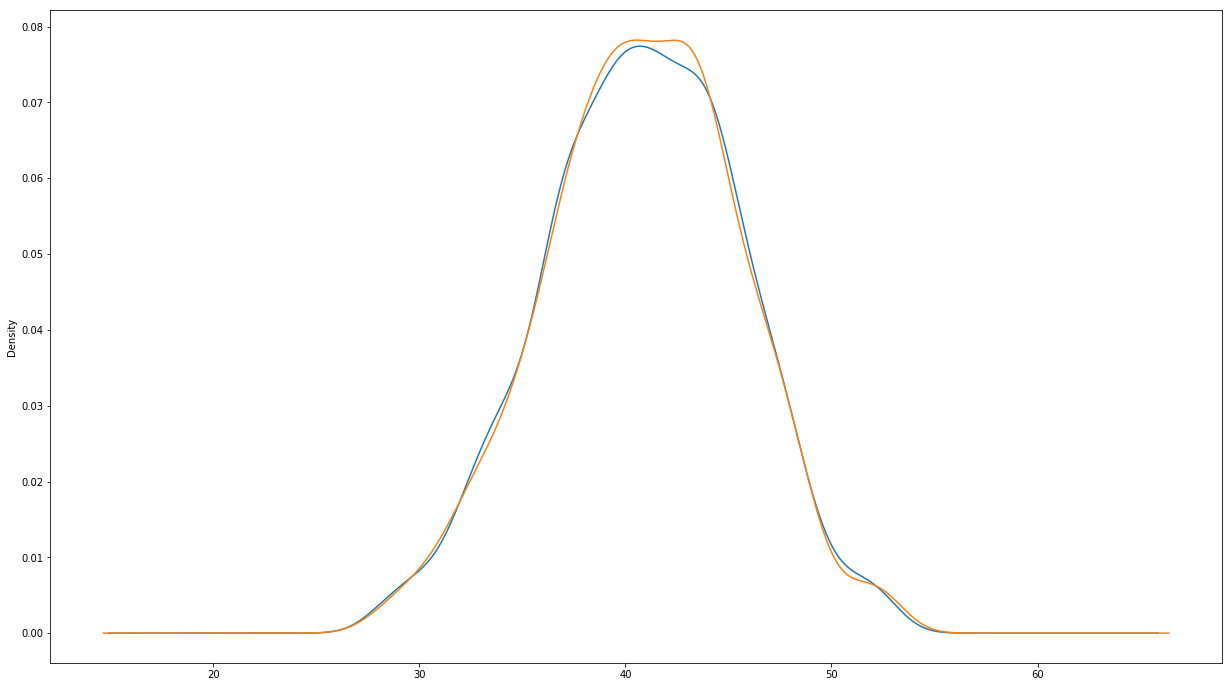

In [99]:
codec1_unified['PSNR(YUV)'].plot.kde()
codec2_unified['PSNR(YUV)'].plot.kde()

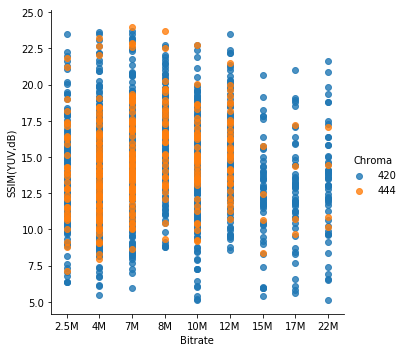

In [86]:
import seaborn as sns
sns.lmplot('Bitrate', 'SSIM(YUV,dB)', data=codec2_unified, 
           hue='Chroma', fit_reg=False);